# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Init" data-toc-modified-id="Init-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Init</a></div><div class="lev1 toc-item"><a href="#Melee-attacks" data-toc-modified-id="Melee-attacks-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Melee attacks</a></div><div class="lev2 toc-item"><a href="#Weapons" data-toc-modified-id="Weapons-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Weapons</a></div><div class="lev1 toc-item"><a href="#Comparing-various-melee-builds" data-toc-modified-id="Comparing-various-melee-builds-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Comparing various melee builds</a></div><div class="lev2 toc-item"><a href="#Comparing-greatsword-builds" data-toc-modified-id="Comparing-greatsword-builds-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Comparing greatsword builds</a></div><div class="lev3 toc-item"><a href="#Bare" data-toc-modified-id="Bare-311"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Bare</a></div><div class="lev3 toc-item"><a href="#With-great-weapon-fighting" data-toc-modified-id="With-great-weapon-fighting-312"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>With great weapon fighting</a></div><div class="lev3 toc-item"><a href="#With-great-weapon-mastery" data-toc-modified-id="With-great-weapon-mastery-313"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>With great weapon mastery</a></div><div class="lev3 toc-item"><a href="#With-both" data-toc-modified-id="With-both-314"><span class="toc-item-num">3.1.4&nbsp;&nbsp;</span>With both</a></div><div class="lev3 toc-item"><a href="#Plot" data-toc-modified-id="Plot-315"><span class="toc-item-num">3.1.5&nbsp;&nbsp;</span>Plot</a></div><div class="lev2 toc-item"><a href="#Greataxe-vs-Greatsword" data-toc-modified-id="Greataxe-vs-Greatsword-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Greataxe vs Greatsword</a></div><div class="lev3 toc-item"><a href="#Adding-2--bonus-crit-dice" data-toc-modified-id="Adding-2--bonus-crit-dice-321"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Adding 2  bonus crit dice</a></div><div class="lev2 toc-item"><a href="#Two-one-handed-weapons-vs.-two-handed-weapons" data-toc-modified-id="Two-one-handed-weapons-vs.-two-handed-weapons-33"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Two one-handed weapons vs. two-handed weapons</a></div><div class="lev3 toc-item"><a href="#Per-round-(assuming-two-hits-for-two-handed-and-three-for-dual-wield)" data-toc-modified-id="Per-round-(assuming-two-hits-for-two-handed-and-three-for-dual-wield)-331"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Per round (assuming two hits for two-handed and three for dual wield)</a></div>

# Init

In [1]:
%%capture

import importlib
import numpy as np
np.random.seed()

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.style
plt.style.use('my_style')

import dnd_melee_attack as DnD
importlib.reload(DnD)

In [2]:
plt.rcParams['axes.linewidth'] = 2 #set the value globally
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['xtick.top'] = 'True'
plt.rcParams['xtick.major.size'] = 6
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['xtick.minor.width'] = 2

plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['ytick.right'] = 'True'
plt.rcParams['ytick.major.size'] = 6
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['ytick.minor.width'] = 2


plt.rcParams['lines.linewidth'] = 2
plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize']=20
plt.rcParams.update({'font.family': 'sans-serif'})

# Melee attacks

The following code is to generate expected damage output per round for a melee attack. I will igorne both mods on to hit and damage die as they are easy to add after the fact. The following additional skills, feats, etc. accounted for:
 - Crits on 19 (such as champion fighter)
 - Great weapon fighting (from fighter)
     - When using a two-handed weapon, one can reroll a 1 or 2 on a damage die for a successful melee attack
 - Great weapon master
     - On your turn, when you score a critical hit with a melee weapon or reduce a creature to 0 hit points with one, you can make one melee weapon attack as a bonus action.
     - Before you make a melee attack with a heavy weapon that you are proficient with, you can choose to take a -5 penalty to the attack roll. If the attack hits, you add +10 to the attack's damage. 

Things to also consider:
 - Fighter two-weapon fighting allows one to add ability mod to all melee attacks
 - Dual wielder allows one to use two-weapon fighting even with non-light one handed weapons

## Weapons

| Simple melee | cost | dmg | weight | type |
|------|------|------|------|------|
| Club | 1 sp | 1d4 bludgeoning | 2 lb. | Light |
| Dagger | 2 gp| 1d4 piercing | 1 lb. | Finesse, light, thrown (range 20/60) |
| Greatclub | 2 sp | 1d8 bludgeoning | 10 lb. | Two-handed |
| Handaxe | 5 gp | 1d6 slashing | 2 lb. |  	Light, thrown (range 20/60) |
| Javelin | 5 sp | 1d6 piercing | 2 lb. | Thrown (range 30/120) |
| Light Hammer | 2 gp | 1d4 bludgeoning | 2 lb. | Light, thrown (range 20/60) |
| Mace | 5 gp | 1d6 bludgeoning | 4 lb. | - |
| Quarterstaff | 2 sp | 1d6 bludgeoning | 4 lb. | Versatile (1d8) |
| Sickle | 1 gp | 1d4 slashing | 2 lb. | Light |
| Spear | 1 gp | 1d6 piercing | 3 lb. | Thrown (range 20/60), versatile (1d8) |

| Simple range | cost | dmg | weight | type |
|------|------|------|------|------|
| Crossbow, light | 25 gp | 1d8 piercing | 5 lb. | Ammunition (range 80/320), loading, two-handed |
| Dart | 5 cp| 1d4 piercing | 1/4 lb. | Finesse, thrown (range 20/60) |
| Shortbow | 25 gp | 1d6 piercing | 2 lb. | Ammunition (range 80/320), two-handed |
| Sling | 1 sp | 1d4 Bludgeoning | - | Ammunition (range 30/120) |

| Martial melee | cost | dmg | weight | type |
|------|------|------|------|------|
| Battleaxe | 10 gp | 1d8 slashing | 4 lb. | Versatile (1d10) |
| Flail | 10 gp| 1d8 bludgeoning | 2 lb. | - |
| Glaive | 20 gp | 1d10 slashing | 6 lb. | Heavy, reach, two-handed |
| Greataxe | 30 gp | 1d12 slashing | 7 lb. | Heavy, two-handed |
| Greatsword | 50 gp | 2d6 slashing | 6 lb. | Heavy, two-handed |
| Halberd | 20 gp | 1d10 slashing | 6 lb. | Heavy, reach, two-handed |
| Lance | 10 gp | 1d12 piercing | 6 lb. |Reach, special |
| Longsword | 15 gp | 1d8 slashing | 3 lb. | Versatile (1d10) |
| Maul | 10 gp | 2d6 bludgeoning | 10 lb. | Heavy, two-handed |
| Morningstar | 15 gp | 1d8 piercing | 4 lb. | — |
| Pike | 5 gp | 1d10 piercing | 18 lb. | Heavy, reach, two-handed |
| Rapier | 25 gp | 1d8 piercing | 2 lb. | Finesse |
| Scimitar | 25 gp | 1d6 slashing | 3 lb. | Finesse, light |
| Shortsword | 10 gp | 1d6 piercing | 2 lb. | Finesse, light |
| Trident | 5 gp | 1d6 piercing | 4 lb. | Thrown (range 20/60), versatile (1d8) |
| War Pick | 5 gp | 1d8 piercing | 2 lb. | — |
| Warhammer | 15 gp | 1d8 bludgeoning | 2 lb. | Versatile (1d10) |
| Whip | 2 gp | 1d4 slashing | 3 lb. | Finesse, reach |

| Martial melee | cost | dmg | weight | type |
|------|------|------|------|------|
| Blowgun | 10 gp | 1 piercing | 1 lb. | Ammunition (range 25/100), loading |
| Crossbow, hand | 75 gp | 1d6 piercing | 3 lb. | Ammunition (range 30/120), light, loading |
| Crossbow, heavy | 50 gp | 1d10 piercing | 18 lb. | Ammunition (range 100/400), heavy, loading, two-handed |
| Longbow | 50 gp | 1d8 piercing | 2 lb. | Ammunition (range 150/600), heavy, two-handed |
| Net | 1 gp | — | 3 lb. | Special, thrown (range 5/15) |

# Comparing various melee builds

## Comparing greatsword builds

Here I compare a greatsword with no additional buffing to adding either the great weapon fighting stance or great weapon mastery feat

In [3]:
DnD.melee_attack(10)

{'to_hit_dice': 5,
 'rolled_hit_dice': [],
 'hit': False,
 'crit': False,
 'mod': 0,
 'bonus_crit_dice': 0,
 'reroll': False,
 'gwm': False,
 'dmg': 0.0}

### Bare

In [4]:
DnD.roll_dmg(to_hit=1, num_hit_dice=2, bonus_crit_dice=2, reroll=True, gwm=True)

{'to_hit_dice': 1,
 'rolled_hit_dice': [],
 'hit': False,
 'crit': False,
 'mod': 0,
 'bonus_crit_dice': 2,
 'reroll': True,
 'gwm': True,
 'dmg': 0.0}

In [5]:
ac = range(21)

In [6]:
gs = DnD.melee_vs_ac(100000, ac, hit_die=6, num_hit_dice=2)
gs['label'] = 'Greatsword'

### With great weapon fighting

In [7]:
gs_gwf = DnD.melee_vs_ac(10000, ac, hit_die=6, num_hit_dice=2, reroll=True)
gs_gwf['label'] = 'GWF'

### With great weapon mastery

In [8]:
gs_gwm = DnD.melee_vs_ac(10000, ac, hit_die=6, num_hit_dice=2, gwm=True)
gs_gwm['label'] = 'GWM'

### With both

In [9]:
gs_both = DnD.melee_vs_ac(10000, ac, hit_die=6, num_hit_dice=2, reroll=True, gwm=True)
gs_both['label'] = 'Both'

### Plot

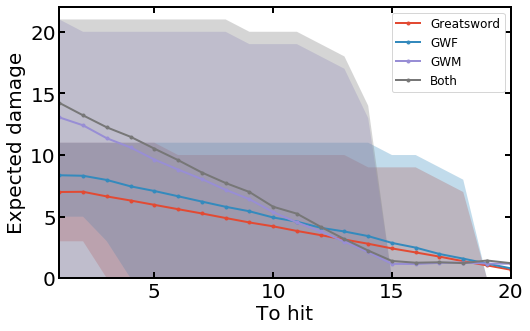

In [10]:
fig,ax = plt.subplots(figsize = (5*1.618,5))

weaps = [gs, gs_gwf, gs_gwm, gs_both]

for weap in weaps:
    plt.plot(ac,weap['dmg_mean'],'.-',label= weap['label'])
    plt.fill_between(ac, weap['dmg_ci_lo'], weap['dmg_ci_hi'], alpha = 0.3)
    
plt.xlim(1,20)
plt.ylim(0)

plt.xlabel('To hit')
plt.ylabel('Expected damage')

plt.legend(fontsize=12)

## Greataxe vs Greatsword

It is generally better to split damage dice into smaller dies than one big one to reduce variance. The greatsword vs greataxe is a great example here. We see that the greatsword has a higher average damage per attack with less variance. 

In [11]:
ga = DnD.melee_vs_ac(100000, range(21), hit_die=12, num_hit_dice=1)
ga['label'] = 'Greataxe'

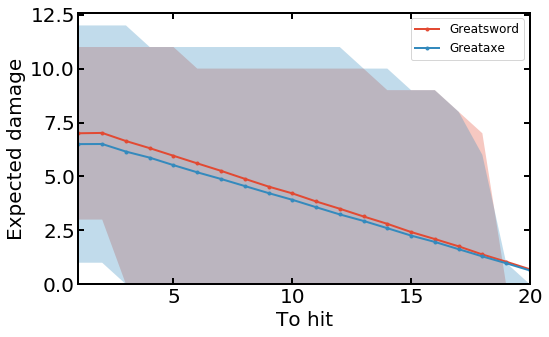

In [12]:
fig,ax = plt.subplots(figsize = (5*1.618,5))

weaps = [gs, ga]

for weap in weaps:
    plt.plot(ac,weap['dmg_mean'],'.-',label= weap['label'])
    plt.fill_between(ac, weap['dmg_ci_lo'], weap['dmg_ci_hi'], alpha = 0.3)
    
plt.xlim(1,20)
plt.ylim(0)

plt.xlabel('To hit')
plt.ylabel('Expected damage')

plt.legend(fontsize=12)

### Adding 2  bonus crit dice

In [13]:
gs_bcrit = DnD.melee_vs_ac(100000, range(21), hit_die=6, num_hit_dice=2, bonus_crit_dice=2)
gs_bcrit['label'] = 'Greatsword w/ +2 crit die'

In [14]:
gs_bcrit19 = DnD.melee_vs_ac(100000, range(21), hit_die=6, num_hit_dice=2, bonus_crit_dice=2, crit_19=True)
gs_bcrit19['label'] = 'Greatsword w/ +2 crit die and 19 crit'
print(gs_bcrit19['dmg_ci_hi'])

[12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 11.0, 0.0, 10.0]


In [15]:
ga_bcrit = DnD.melee_vs_ac(100000, range(21), hit_die=12, num_hit_dice=1, bonus_crit_dice=2)
ga_bcrit['label'] = 'Greataxe w/ +2 crit die'

In [16]:
ga_bcrit19 = DnD.melee_vs_ac(100000, range(21), hit_die=12, num_hit_dice=1, bonus_crit_dice=2, crit_19=True)
ga_bcrit19['label'] = 'Greataxe w/ +2 crit die and 19 crit'
print(ga_bcrit19['dmg_ci_hi'])

[12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 0.0, 11.0]


In [17]:
for i in range(20):
    test = DnD.melee_vs_ac(100000, [19,20], ci=1, hit_die=12, num_hit_dice=1, bonus_crit_dice=2, crit_19=True)
    print(test['dmg_ci_hi'])

[35.0, 35.0]
[35.0, 35.0]
[35.0, 35.0]
[35.0, 35.0]
[35.0, 35.0]
[35.0, 35.0]
[35.0, 35.0]
[35.0, 35.0]
[35.0, 35.0]
[35.0, 35.0]
[35.0, 35.0]
[35.0, 35.0]
[35.0, 35.0]
[35.0, 35.0]
[35.0, 35.0]
[35.0, 35.0]
[35.0, 35.0]
[35.0, 35.0]
[35.0, 35.0]
[35.0, 35.0]


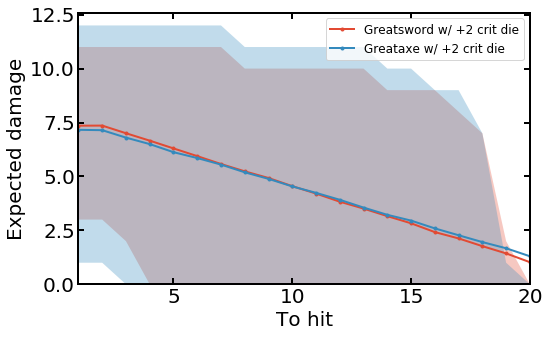

In [18]:
fig,ax = plt.subplots(figsize = (5*1.618,5))

weaps = [gs_bcrit, ga_bcrit]

for weap in weaps:
    plt.plot(ac,weap['dmg_mean'],'.-',label= weap['label'])
    plt.fill_between(ac, weap['dmg_ci_lo'], weap['dmg_ci_hi'], alpha = 0.3)
    
plt.xlim(1,20)
plt.ylim(0)

plt.xlabel('To hit')
plt.ylabel('Expected damage')

plt.legend(fontsize=12)

Text(0,0.5,'Expected damage')

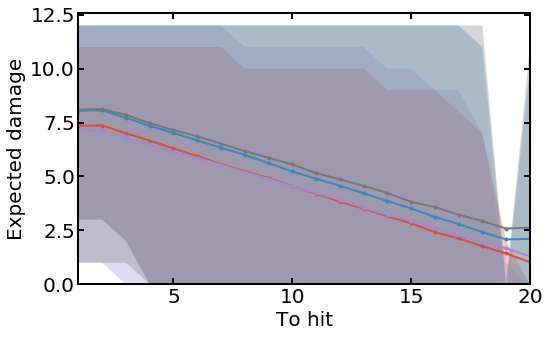

In [19]:
fig,ax = plt.subplots(figsize = (5*1.618,5))

weaps = [gs_bcrit, gs_bcrit19, ga_bcrit, ga_bcrit19]

for weap in weaps:
    plt.plot(ac,weap['dmg_mean'],'.-',label= weap['label'])
    plt.fill_between(ac, weap['dmg_ci_lo'], weap['dmg_ci_hi'], alpha = 0.3)
plt.xlim(1,20)
plt.ylim(0)

plt.xlabel('To hit')
plt.ylabel('Expected damage')

#plt.legend(fontsize=12)

## Two one-handed weapons vs. two-handed weapons

This is where the dual weapon feat and dual weapon fighter stance can really help. I will be comparing the following builds:
- Greataxe with GWM
- Greataxe with GWM, GWF
- Dual weapon with TWF (ability mod: 9)
- Dual weapon with TWF and crits on 19 (ability mod: 8)

For my current build, I am making a half-orc barbarian so I will also consider using savage attacks to provide advantage (particularly with GWM), and bonus dice on criticals. Because of the extra damage dice, I will be using either battleaxes or greataxes.

When considering the extra attack with TWF, we need to consider an extra ability modifier. If planning for spreading out 15 levels, the ability mod will be approximately as listed above (depending on strength)

In [20]:
ga = DnD.melee_vs_ac(100000, range(21), num_attacks=2, hit_die=12, num_hit_dice=1, mod=8, bonus_crit_dice=3)
ga['label'] = '2xGA'

In [21]:
ga_adv = DnD.melee_vs_ac(100000, range(21), num_attacks=2, hit_die=12, num_hit_dice=1, mod=8, 
                         bonus_crit_dice=3, advantage=True)
ga_adv['label'] = '2xGA w/ adv'

In [22]:
ga_gwm = DnD.melee_vs_ac(100000, range(21), num_attacks=2, hit_die=12, num_hit_dice=1, mod=8, 
                         bonus_crit_dice=3, gwm=True)
ga_gwm['label'] = '2xGA w/ gwm'

In [23]:
ga_gwm_adv = DnD.melee_vs_ac(100000, range(21), num_attacks=2, hit_die=12, num_hit_dice=1, mod=8, 
                               bonus_crit_dice=3, advantage=True, gwm=True)
ga_gwm_adv['label'] = '2xGA w/ gwm and adv'

In [24]:
ga_decked = DnD.melee_vs_ac(100000, range(21), num_attacks=2, hit_die=12, num_hit_dice=1, mod=8, 
                               bonus_crit_dice=2, advantage=True, reroll=True, gwm=True, crit_19=True)
ga_decked['label'] = '2xGA w/ gwm, gwf, crit 19, and adv'

In [25]:
ba = DnD.melee_vs_ac(100000, range(21), num_attacks=3, hit_die=8, num_hit_dice=1, mod=8, bonus_crit_dice=3)
ba['label'] = '3xBA'

In [26]:
ba_adv = DnD.melee_vs_ac(100000, range(21), num_attacks=3, hit_die=8, num_hit_dice=1, mod=8, 
                       bonus_crit_dice=3, advantage=True)
ba_adv['label'] = '3xBA w/ adv'

In [27]:
ba_crit19 = DnD.melee_vs_ac(100000, range(21), num_attacks=3, hit_die=8, num_hit_dice=1, mod=8, 
                       bonus_crit_dice=2, crit_19=True)
ba_crit19['label'] = '3xBA w/ crit 19'

In [ ]:
ba_crit19_adv = DnD.melee_vs_ac(100000, range(21), num_attacks=3, hit_die=8, num_hit_dice=1, mod=8, 
                       bonus_crit_dice=2, advantage=True, crit_19=True)
ba_crit19_adv['label'] = '3xBA w/ crit 19 and adv'

### Per round (assuming two hits for two-handed and three for dual wield)

In [ ]:
fig,ax = plt.subplots(figsize = (5*1.618,5))

weaps = [ba, ga]

for weap in weaps:
    plt.plot(ac,weap['dmg_mean'],'.-',label= weap['label'])
    plt.fill_between(ac, weap['dmg_ci_lo'], weap['dmg_ci_hi'], alpha = 0.3)
    
plt.xlim(1,20)
plt.ylim(0)

plt.xlabel('To hit')
plt.ylabel('Expected damage')

plt.legend(fontsize=12)

In [ ]:
fig,ax = plt.subplots(figsize = (5*1.618,5))

weaps = [ba, ba_crit19_adv]

for weap in weaps:
    plt.plot(ac,weap['dmg_mean'],'.-',label= weap['label'])
    plt.fill_between(ac, weap['dmg_ci_lo'], weap['dmg_ci_hi'], alpha = 0.3)
    
plt.xlim(1,20)
plt.ylim(0)

plt.xlabel('To hit')
plt.ylabel('Expected damage')

plt.legend(fontsize=12)

In [ ]:
fig,ax = plt.subplots(figsize = (5*1.618,5))

weaps = [ba, ga_gwm]

for weap in weaps:
    plt.plot(ac,weap['dmg_mean'],'.-',label= weap['label'])
    plt.fill_between(ac, weap['dmg_ci_lo'], weap['dmg_ci_hi'], alpha = 0.3)
    
plt.xlim(1,20)
plt.ylim(0)

plt.xlabel('To hit')
plt.ylabel('Expected damage')

plt.legend(fontsize=12)

In [ ]:
fig,ax = plt.subplots(figsize = (5*1.618,5))

weaps = [ga, ga_gwm]

for weap in weaps:
    plt.plot(ac,weap['dmg_mean'],'.-',label= weap['label'])
    plt.fill_between(ac, weap['dmg_ci_lo'], weap['dmg_ci_hi'], alpha = 0.3)
    
plt.xlim(1,20)
plt.ylim(0)

plt.xlabel('To hit')
plt.ylabel('Expected damage')

plt.legend(fontsize=12)

In [ ]:
fig,ax = plt.subplots(figsize = (5*1.618,5))

weaps = [ga, ga_gwm_adv]

for weap in weaps:
    plt.plot(ac,weap['dmg_mean'],'.-',label= weap['label'])
    plt.fill_between(ac, weap['dmg_ci_lo'], weap['dmg_ci_hi'], alpha = 0.3)
    
plt.xlim(1,20)
plt.ylim(0)

plt.xlabel('To hit')
plt.ylabel('Expected damage')

plt.legend(fontsize=12)

In [ ]:
fig,ax = plt.subplots(figsize = (10*1.618,5))

plt.subplot(121)
weaps = [ba_adv, ba_crit19_adv]

for weap in weaps:
    plt.plot(ac,weap['dmg_mean'],'.-',label= weap['label'])
    plt.fill_between(ac, weap['dmg_ci_lo'], weap['dmg_ci_hi'], alpha = 0.3)
    
plt.xlim(1,20)
plt.ylim(0)

plt.xlabel('To hit')
plt.ylabel('Expected damage')

plt.legend(fontsize=12)

plt.subplot(122)
weaps = [ba, ba_crit19]

for weap in weaps:
    plt.plot(ac,weap['dmg_mean'],'.-',label= weap['label'])
    plt.fill_between(ac, weap['dmg_ci_lo'], weap['dmg_ci_hi'], alpha = 0.3)
    
plt.xlim(1,20)
plt.ylim(0)

plt.xlabel('To hit')
plt.ylabel('Expected damage')

plt.legend(fontsize=12)

In [ ]:
fig,ax = plt.subplots(figsize = (5*1.618,5))

weaps = [ga_gwm_adv, ga_decked]

for weap in weaps:
    plt.plot(ac,weap['dmg_mean'],'.-',label= weap['label'])
    plt.fill_between(ac, weap['dmg_ci_lo'], weap['dmg_ci_hi'], alpha = 0.3)
    
plt.xlim(1,20)
plt.ylim(0)

plt.xlabel('To hit')
plt.ylabel('Expected damage')

plt.legend(fontsize=12)

In [ ]:
fig,ax = plt.subplots(figsize = (5*1.618,5))

weaps = [ba_crit19_adv, ga_decked, ga_gwm_adv, ga_adv]

for weap in weaps:
    plt.plot(ac,weap['dmg_mean'],'.-',label= weap['label'])
    plt.fill_between(ac, weap['dmg_ci_lo'], weap['dmg_ci_hi'], alpha = 0.3)
    
plt.xlim(1,20)
plt.ylim(0,80)

plt.xlabel('To hit')
plt.ylabel('Expected damage')

plt.legend(fontsize=12)

In [ ]:
fig,ax = plt.subplots(figsize = (5*1.618,5))

weaps = [ba_crit19, ga_gwm, ga]

for weap in weaps:
    plt.plot(ac,weap['dmg_mean'],'.-',label= weap['label'])
    plt.fill_between(ac, weap['dmg_ci_lo'], weap['dmg_ci_hi'], alpha = 0.3)
    
plt.xlim(1,20)

plt.xlabel('To hit')
plt.ylabel('Expected damage')

plt.legend(fontsize=12)

In [ ]:
fig,ax = plt.subplots(figsize = (5*1.618,5))

weaps = [ga, ba_adv, ga_gwm, ga_gwm_adv]

for weap in weaps:
    plt.plot(ac,weap['hit_chance'],'.-',label= weap['label'])
    
plt.xlim(1,20)

plt.xlabel('To hit')
plt.ylabel('Hit chance')

plt.legend(fontsize=12)